In [1]:
# The basic EDA

In [2]:
# Loading the data of domain 1 and domain 2
import json
domain1 = []
with open('../data/domain1_train.json', 'r') as json_file:
    for line in json_file:
        try:
            json_data = json.loads(line)
            domain1.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON: {e}")
domain2 = []
with open('../data/domain2_train.json', 'r') as json_file:
    for line in json_file:
        try:
            json_data = json.loads(line)
            domain2.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON: {e}")
            

# Proportion of word distribution between two domains

In [3]:
# label 0 machine and label 1 human
# This is the list of word which mixed human and machine, machine only and human only for two domain
all_word_1 = []
machine_word_1 = []
human_word_1 = []
for i in range(0,len(domain1)):
    for word in domain1[i]['text']:
        if domain1[i]['label'] == 0:
            machine_word_1.append(word)
        if domain1[i]['label'] == 1:
            human_word_1.append(word)
        all_word_1.append(word)
# how many unique words occurred in two datasets

all_word_2 = []
machine_word_2 =[]
human_word_2 = []
for i in range(0,len(domain2)):
    for word in domain2[i]['text']:
        if domain2[i]['label'] == 0:
            machine_word_2.append(word)
        if domain2[i]['label'] == 1:
            human_word_2.append(word)
        all_word_2.append(word)

def calculate_word_percentage(word_list):
    word_count = {}
    for word in word_list:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
    
    word_percentage = {}
    total_words = len(word_list)
    
    for key, value in word_count.items():
        word_percentage[key] = (value / total_words) * 100
    
    return word_count, word_percentage

word_count_1, word_percentage_1 = calculate_word_percentage(all_word_1)

word_count_2, word_percentage_2 = calculate_word_percentage(all_word_2)

human_word_count_1,human_word_percentage_1 = calculate_word_percentage(human_word_1)

human_word_count_2,human_word_percentage_2 = calculate_word_percentage(human_word_2)

machine_word_count_1, machine_word_percentage_1 = calculate_word_percentage(machine_word_1)

machine_word_count_2, machine_word_percentage_2 = calculate_word_percentage(machine_word_2)


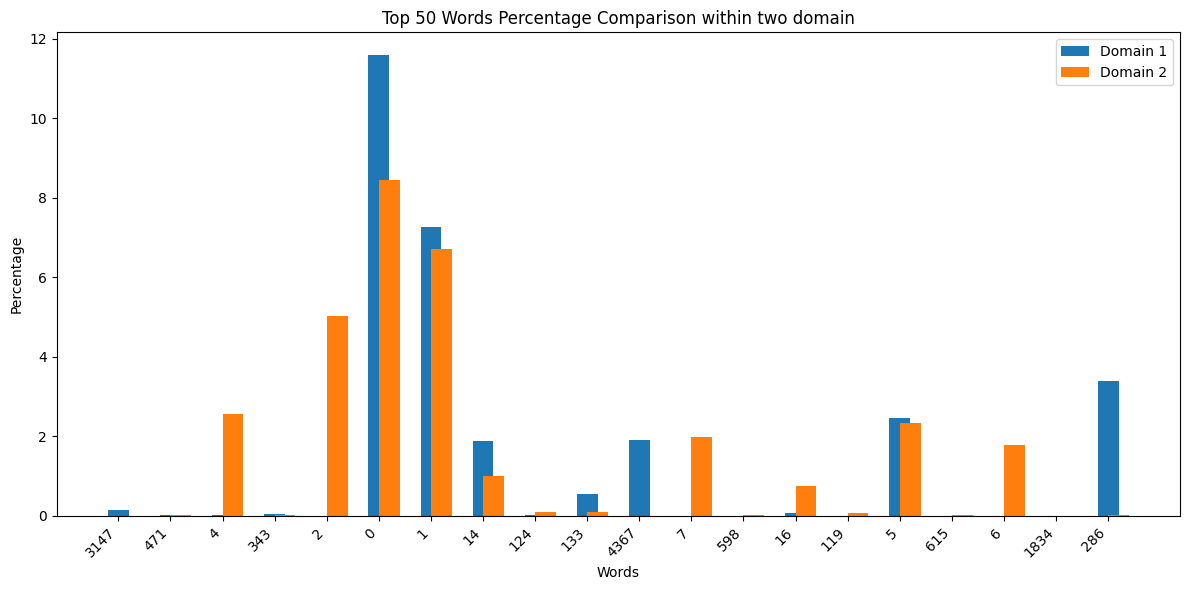

In [4]:
import matplotlib.pyplot as plt
top_words_1 = list(word_percentage_1.keys())[:20]
top_percentage_1 = [word_percentage_1[word] for word in top_words_1]
word_labels_1 = top_words_1  

top_words_2 = list(word_percentage_2.keys())[:20]
top_percentage_2 = [word_percentage_2[word] for word in top_words_2]
word_labels_2 = top_words_2  

plt.figure(figsize=(12, 6))
plt.bar(range(1, 21), top_percentage_1, label='Domain 1', width=0.4, align='center', tick_label=word_labels_1)
plt.bar(range(1, 21), top_percentage_2, label='Domain 2', width=0.4, align='edge', tick_label=word_labels_2)
# 这个图是所有的词汇 不管是人评论的还是机器评论的都融合在一起了
plt.title('Top 50 Words Percentage Comparison within two domain')
plt.xlabel('Words')
plt.ylabel('Percentage')

plt.legend()

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


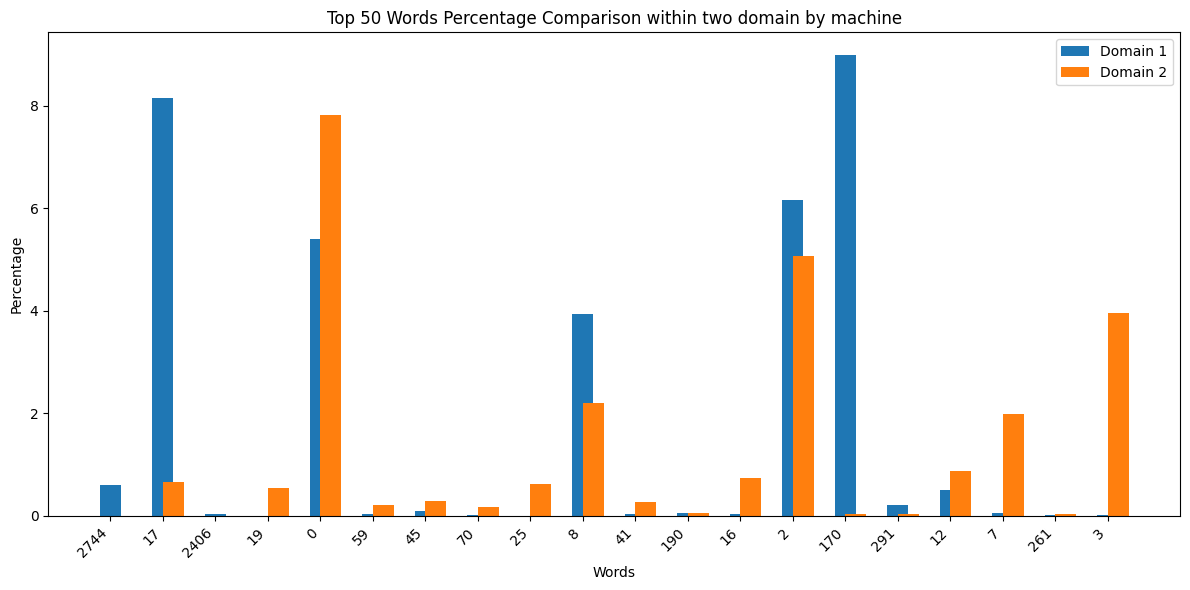

In [5]:
import matplotlib.pyplot as plt
top_words_1 = list(machine_word_percentage_1.keys())[:20]
top_percentage_1 = [machine_word_percentage_1[word] for word in top_words_1]
word_labels_1 = top_words_1  

top_words_2 = list(machine_word_percentage_2.keys())[:20]
top_percentage_2 = [machine_word_percentage_2[word] for word in top_words_2]
word_labels_2 = top_words_2  

plt.figure(figsize=(12, 6))
plt.bar(range(1, 21), top_percentage_1, label='Domain 1', width=0.4, align='center', tick_label=word_labels_1)
plt.bar(range(1, 21), top_percentage_2, label='Domain 2', width=0.4, align='edge', tick_label=word_labels_2)
# 这个图是所有的词汇 是机器的评论
plt.title('Top 50 Words Percentage Comparison within two domain by machine')
plt.xlabel('Words')
plt.ylabel('Percentage')

plt.legend()

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


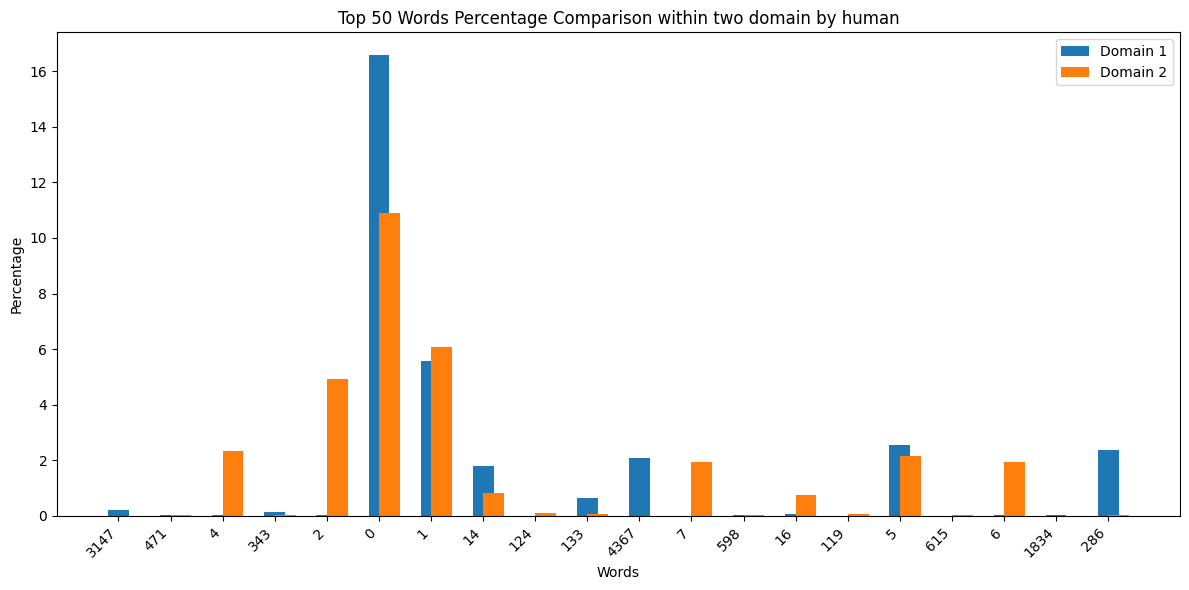

In [6]:
import matplotlib.pyplot as plt
top_words_1 = list(human_word_percentage_1.keys())[:20]
top_percentage_1 = [human_word_percentage_1[word] for word in top_words_1]
word_labels_1 = top_words_1  

top_words_2 = list(human_word_percentage_2.keys())[:20]
top_percentage_2 = [human_word_percentage_2[word] for word in top_words_2]
word_labels_2 = top_words_2  

plt.figure(figsize=(12, 6))
plt.bar(range(1, 21), top_percentage_1, label='Domain 1', width=0.4, align='center', tick_label=word_labels_1)
plt.bar(range(1, 21), top_percentage_2, label='Domain 2', width=0.4, align='edge', tick_label=word_labels_2)
# 这个图是所有的词汇 是机器的评论
plt.title('Top 50 Words Percentage Comparison within two domain by human')
plt.xlabel('Words')
plt.ylabel('Percentage')

plt.legend()

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

# Average length of text by human and machine from each domain(mean and sd)

In [7]:
# Caculating the average length of text by human and machine from each domain
# extract the comment from human and people for each domain
# DOMAIN 1111111
# domain 1的人工评论和机器评论
machine_list_1 = []
human_list_1 = []
for item in domain1:
    if item['label'] == 0:
        machine_list_1.append(item)
    elif item['label'] == 1:
        human_list_1.append(item)
# calculating all the length of the comment of machine and human in domain 1
all_machine_len_1 = []
all_human_len_1 = []
for value in machine_list_1:
    all_machine_len_1.append(len(value['text']))
for value in human_list_1:
    all_human_len_1.append(len(value['text']))

# domain 2的人工评论和机器评论
machine_list_2 = []
human_list_2 = []
for item in domain2:
    if item['label'] == 0:
        machine_list_2.append(item)
    elif item['label'] == 1:
        human_list_2.append(item)
# calculating all the length of the comment of machine and human in domain 1
all_machine_len_2 = []
all_human_len_2 = []
for value in machine_list_2:
    all_machine_len_2.append(len(value['text']))
for value in human_list_2:
    all_human_len_2.append(len(value['text']))



In [8]:
# Domain 1的评论长度分布
import numpy as np


mean_machine_len_1 = np.mean(all_machine_len_1)
mean_human_len_1 = np.mean(all_human_len_1)


variance_machine_len_1 = np.var(all_machine_len_1)
variance_human_len_1 = np.var(all_human_len_1)


print("Machine Length Mean:", mean_machine_len_1)
print("Machine Length Variance:", variance_machine_len_1)

print("Human Length Mean:", mean_human_len_1)
print("Human Length Variance:", variance_human_len_1)


Machine Length Mean: 52.249435897435895
Machine Length Variance: 1481.474602245891
Human Length Mean: 27.281128205128205
Human Length Variance: 159.6900951374096


In [9]:
def variance(data):
    # Calculate the mean
    mean = sum(data) / len(data)
    
    # Calculate the variance
    var = sum((x - mean) ** 2 for x in data) / len(data)
    return var

variance(all_machine_len_2)

21040.184852404618

In [10]:
# Domain 2's mean and var
import numpy as np


mean_machine_len_2 = np.mean(all_machine_len_2)
mean_human_len_2 = np.mean(all_human_len_2)


variance_machine_len_2 = np.var(all_machine_len_2)
variance_human_len_2 = np.var(all_human_len_2)


print("Machine Length Mean:", mean_machine_len_2)
print("Machine Length Variance:", variance_machine_len_2)

print("Human Length Mean:", mean_human_len_2)
print("Human Length Variance:", variance_human_len_2)

Machine Length Mean: 146.33654901960784
Machine Length Variance: 21040.184852404458
Human Length Mean: 216.9660465116279
Human Length Variance: 45218.96303320714


# Average count of distinctive words between human and machine from each domain
每个domain人工和机器人的词汇量

In [11]:
print("Machine knowledge in domain 1: ",len(set(machine_word_1)))
print("Machine knowledge in domain 2: ",len(set(machine_word_2)))
print("Human knowledge in domain 1: ",len(set(human_word_1)))
print("Human knowledge in domain 2: ",len(set(human_word_2)))

Machine knowledge in domain 1:  4514
Machine knowledge in domain 2:  4947
Human knowledge in domain 1:  4836
Human knowledge in domain 2:  4914


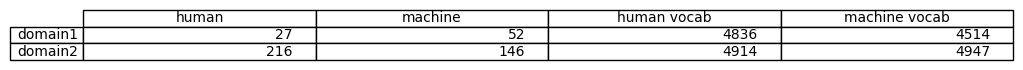

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'human': [27, 216],
    'machine': [52, 146],
    'human vocab': [4836, 4914],
    'machine vocab': [4514, 4947]
}

index_labels = ['domain1', 'domain2']

df = pd.DataFrame(data, index=index_labels)

# Plotting
fig, ax = plt.subplots(figsize=(12, 0.5))  # set the size that you'd like (width, height)
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center')
plt.savefig('EDA.png', dpi=300, bbox_inches='tight')

